# Sentimental analysis & Time series

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Advance Data Analytics- project/ProjectTweets.csv')

# Display the first few rows of the DataFrame
df.head(10)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,6,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,7,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,8,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,10,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [ ]:
pip install nltk


In [ ]:
pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from nltk.sentiment import SentimentIntensityAnalyzer
import praw
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk


In [ ]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [ ]:
# Name of the columns
print(df.columns)


Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')


Exploratory Data Analysis

In [ ]:

#  Ignore the headers of the DataFrame
df = pd.read_csv('/content/drive/MyDrive/Advance Data Analytics- project/ProjectTweets.csv', header=None)

#  My column names
df_columns = ['Id', 'Code', 'Date', 'No_Query','User','Comments']

# column names to the DataFrame
df.columns = df_columns

df.head()


,Id,Code,Date,No_Query,User,Comments
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Drop irrelevant columns
df = df.drop(['Id', 'No_Query', ], axis=1)

df.dropna(inplace=True)

df.head()

,Code,Date,User,Comments
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:

# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

# check for missing values in the entire DataFrame
total_missing = missing_values.sum()
print("\nTotal missing values in the DataFrame:", total_missing)


Missing values in each column:
Code        0
Date        0
User        0
Comments    0
dtype: int64

Total missing values in the DataFrame: 0


Descriptive Statistics

In [ ]:
# Select the columns 'date' and 'comments'
selected_columns = ['Date', 'Comments']
subset_df = df[selected_columns]

# Compute and interpret the mean, median, quartiles, and standard deviation
summary_stats = subset_df.describe()

# Display the summary statistics
print("Summary statistics for 'date' and 'tweet count':")
print(summary_stats)

Summary statistics for 'date' and 'tweet count':
                                Date                   Comments
count                        1600000                    1600000
unique                        774363                    1581466
top     Mon Jun 15 12:53:14 PDT 2009  isPlayer Has Died! Sorry 
freq                              20                        210


In [ ]:
from dateutil import parser


df['Date'] = df['Date'].apply(parser.parse)

# Print the 'Date' column with the new format
print(df[['Date']].head())


/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


                 Date
0 2009-04-06 22:19:45
1 2009-04-06 22:19:49
2 2009-04-06 22:19:53
3 2009-04-06 22:19:57
4 2009-04-06 22:19:57


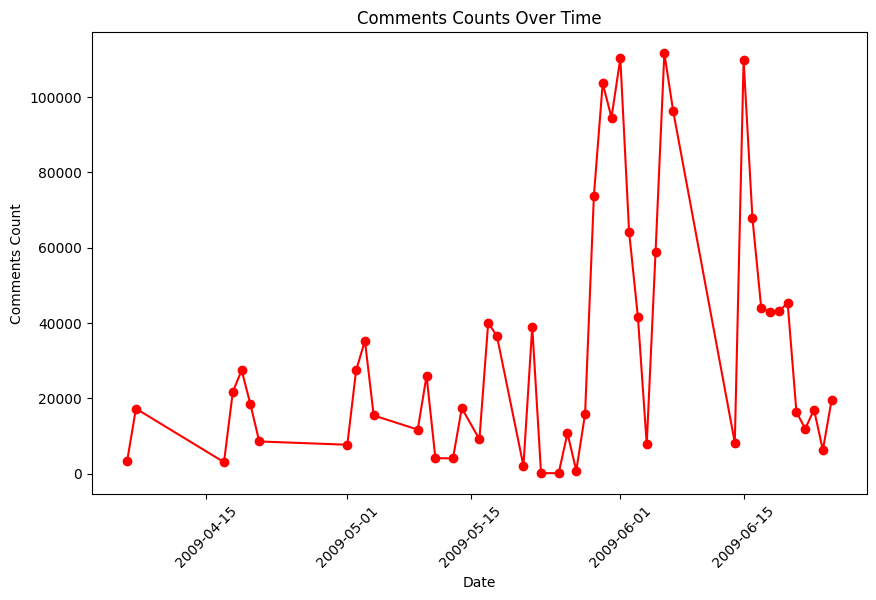

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame with a datetime column 'Date' and a target column 'Value'
# Convert 'Date' column in string format to the timestamp
df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d %H:%M:%S %Z %Y')

# Group the data by the date without the hour
df['date_erased_hour'] = df['Date'].dt.date
date_counts = df.groupby("date_erased_hour").size().reset_index(name='comments_count')

# Sort the data by date without hour
date_counts = date_counts.sort_values("date_erased_hour")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(date_counts['date_erased_hour'], date_counts['comments_count'], marker='o', linestyle='-', color='red')
plt.title('Comments Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Comments Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:

from datetime import timedelta

# Convert 'Date' column in string format to the timestamp
df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d %H:%M:%S %Z %Y')

# Sort the DataFrame by date
df = df.sort_values("Date")

# Calculate the difference between consecutive dates
df['date_diff'] = df['Date'].diff()

# Define a threshold for the maximum allowed difference (e.g., 1 day)
max_allowed_diff = timedelta(days=1)

# Identify breaks in the continuous sequence
df['is_continuous'] = df['date_diff'] <= max_allowed_diff

# Assign a group identifier to continuous sequences
df['group_id'] = (df['is_continuous'] != df['is_continuous'].shift()).cumsum()

# Filter only the rows with continuous sequences
continuous_dates = df[df['is_continuous']].loc[:, ['Date']].drop_duplicates()

# Check if the DataFrame is not empty
if not continuous_dates.empty:
    # Get the first and last dates in the DataFrame
    first_date = continuous_dates['Date'].iloc[0]
    last_date = continuous_dates['Date'].iloc[-1]

    # Print the first and last dates
    print("First Date:", first_date)
    print("Last Date:", last_date)

    # Define the start and end date for the range
    start_date = first_date
    end_date = last_date

    # Generate a list of all dates in the range
    date_range = pd.date_range(start=start_date, end=end_date)

    # Convert the list of continuous dates to a Python list
    continuous_dates_list = list(continuous_dates['Date'])

    # Find the dates not in the list
    missing_dates = [d for d in date_range if d not in continuous_dates_list]

    # Print the missing dates
    for missing_date in missing_dates:
        print(missing_date)

    # Count the missing days
    missing_days_count = len(missing_dates)

    # Print if there are missing
    print("Missing Days :", missing_days_count)
else:
    print("No continuous dates found.")




First Date: 2009-04-06 22:19:49
Last Date: 2009-06-25 10:28:31
2009-04-07 22:19:49
2009-04-08 22:19:49
2009-04-09 22:19:49
2009-04-10 22:19:49
2009-04-11 22:19:49
2009-04-12 22:19:49
2009-04-13 22:19:49
2009-04-14 22:19:49
2009-04-15 22:19:49
2009-04-16 22:19:49
2009-04-17 22:19:49
2009-04-18 22:19:49
2009-04-19 22:19:49
2009-04-20 22:19:49
2009-04-21 22:19:49
2009-04-22 22:19:49
2009-04-23 22:19:49
2009-04-24 22:19:49
2009-04-25 22:19:49
2009-04-26 22:19:49
2009-04-27 22:19:49
2009-04-28 22:19:49
2009-04-29 22:19:49
2009-04-30 22:19:49
2009-05-02 22:19:49
2009-05-04 22:19:49
2009-05-05 22:19:49
2009-05-06 22:19:49
2009-05-07 22:19:49
2009-05-08 22:19:49
2009-05-09 22:19:49
2009-05-10 22:19:49
2009-05-11 22:19:49
2009-05-12 22:19:49
2009-05-13 22:19:49
2009-05-14 22:19:49
2009-05-15 22:19:49
2009-05-17 22:19:49
2009-05-18 22:19:49
2009-05-19 22:19:49
2009-05-20 22:19:49
2009-05-21 22:19:49
2009-05-22 22:19:49
2009-05-23 22:19:49
2009-05-24 22:19:49
2009-05-25 22:19:49
2009-05-26 22:19:

# Data Pre Processing

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Remove punctuation
punct = string.punctuation

# Normaliza words
stemmer = PorterStemmer()

In [ ]:
print(df.columns)


Index(['Code', 'Date', 'User', 'Comments', 'date_without_hour',
       'date_erased_hour', 'next_date', 'is_continuous', 'group_id',
       'date_diff'],
      dtype='object')


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

# Define a function to preprocess text
def preprocess_text(text):
    # Remove special characters and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return text

# preprocessing to the 'Comments' column
df['Comments'] = df['Comments'].apply(preprocess_text)

# Define a function to tokenize words
def tokenize_words(text):
    return word_tokenize(text)

# Apply word tokenization to the 'Comments' column
df['Comments'] = df['Comments'].apply(tokenize_words)
df.head()


,Code,Date,User,Comments,date_without_hour,date_erased_hour,next_date,is_continuous,group_id,date_diff
0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"[switchfoot, httptwitpiccomyzl, awww, thats, a...",2009-04-06,2009-04-06,2009-04-06 22:19:49,False,1,NaT
1,1467810672,2009-04-06 22:19:49,scotthamilton,"[is, upset, that, he, cant, update, his, faceb...",2009-04-06,2009-04-06,2009-04-06 22:19:53,True,2,0 days 00:00:04
2,1467810917,2009-04-06 22:19:53,mattycus,"[kenichan, i, dived, many, times, for, the, ba...",2009-04-06,2009-04-06,2009-04-06 22:19:57,True,2,0 days 00:00:04
3,1467811184,2009-04-06 22:19:57,ElleCTF,"[my, whole, body, feels, itchy, and, like, its...",2009-04-06,2009-04-06,2009-04-06 22:19:57,True,2,0 days 00:00:04
4,1467811193,2009-04-06 22:19:57,Karoli,"[nationwideclass, no, its, not, behaving, at, ...",2009-04-06,2009-04-06,2009-04-06 22:20:00,True,2,0 days 00:00:00


In [ ]:
# stemming function
def normalize_words(text):
    stemmer = nltk.PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words

# Apply word stemming to the 'Comments' column
df['Comments'] = df['Comments'].apply(normalize_words)


In [ ]:
# Join the tokenized and preprocessed words into a single string
df['Comments'] = df['Comments'].apply(lambda words: ' '.join(words))

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'Comments' column to create a document-term matrix
X = vectorizer.fit_transform(df['Comments'])


# Sentiment Analysis with NLTK:

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each comment
df['Sentiment'] = df['Comments'].apply(lambda x: sia.polarity_scores(x)['compound'])




In [ ]:
# Create a new column to add the sentiment
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative')

# rows to check  the new column
print(df[['Comments', 'Sentiment', 'Sentiment_Label']].head())


                                            Comments  Sentiment  \
0  switchfoot httptwitpiccomyzl awww that a bumme...    -0.3818   
1  is upset that he cant updat hi facebook by tex...    -0.4588   
2  kenichan i dive mani time for the ball manag t...     0.4939   
3       my whole bodi feel itchi and like it on fire     0.0258   
4  nationwideclass no it not behav at all im mad ...    -0.6597   

  Sentiment_Label  
0        Negative  
1        Negative  
2        Positive  
3        Positive  
4        Negative  


In [ ]:
df.head()

,Code,Date,User,Comments,Sentiment,Negative,Neutral,Positive,Sentiment_Label
0,1467810369,NaT,_TheSpecialOne_,switchfoot httptwitpiccomyzl awww that a bumme...,-0.3818,1,0,0,Negative
1,1467810672,NaT,scotthamilton,is upset that he cant updat hi facebook by tex...,-0.4588,1,0,0,Negative
2,1467810917,NaT,mattycus,kenichan i dive mani time for the ball manag t...,0.4939,0,0,1,Positive
3,1467811184,NaT,ElleCTF,my whole bodi feel itchi and like it on fire,0.0258,0,0,1,Positive
4,1467811193,NaT,Karoli,nationwideclass no it not behav at all im mad ...,-0.6597,1,0,0,Negative


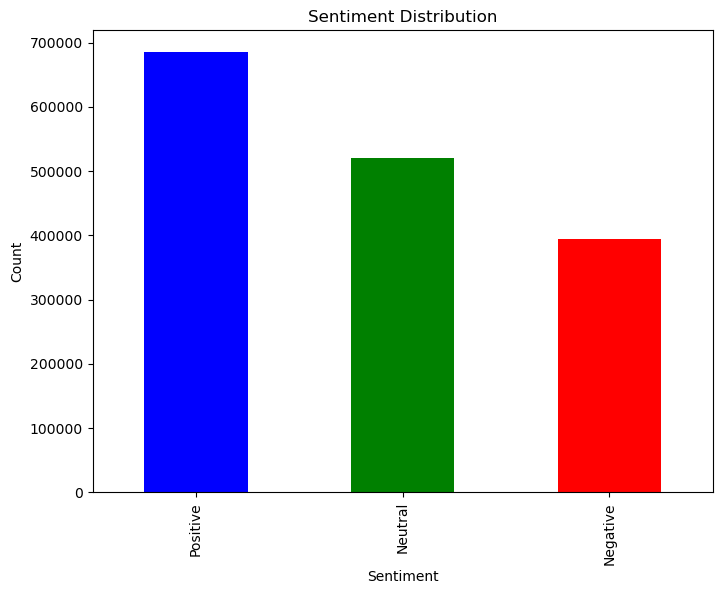

In [ ]:
import matplotlib.pyplot as plt

# Count the number of comments in each sentiment category
sentiment_counts = df['Sentiment_Label'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')


plt.show()



In [ ]:
#'date_without_hour' is already in datetime format
df['date_without_hour'] = pd.to_datetime(df['date_without_hour'])

In [ ]:
# Ensure Timestamp as Index
df.set_index('date_without_hour', inplace=True)


In [ ]:
# Print the first few rows of the resampled DataFrame
print(df_weekly.head())


                           Code  is_continuous  group_id  Sentiment
date_without_hour                                                  
2009-04-11         1.468873e+09       0.999952  1.999952   0.126049
2009-04-18         1.555970e+09       0.999981  3.999981   0.142282
2009-04-25         1.568299e+09       1.000000  4.000000   0.135722
2009-05-02         1.683930e+09       0.999986  5.999986   0.138019
2009-05-09         1.737143e+09       0.999981  7.418524   0.137194


<ipython-input-71-f1412e985c3d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df.resample('W', closed='left').mean()


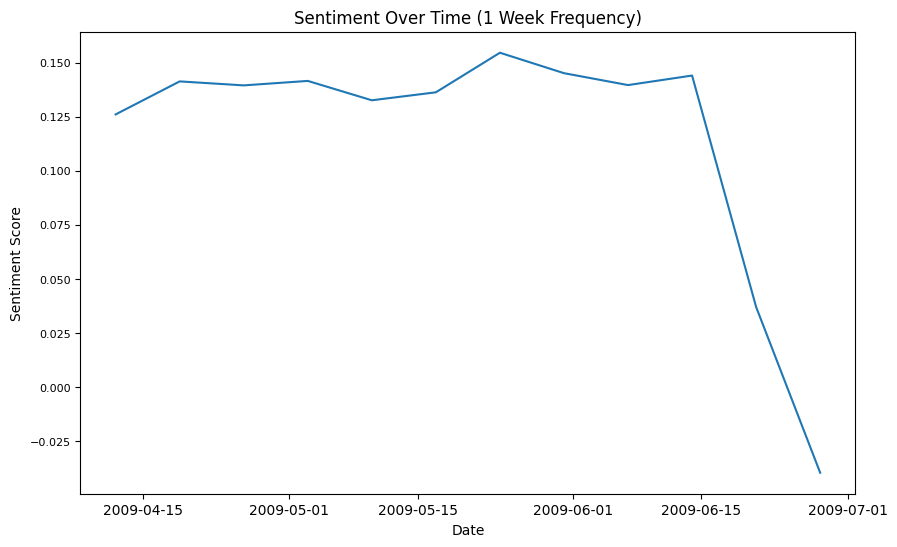

In [ ]:
# Resample to 1 week with explicitly setting the labels to the left endpoint
df_weekly = df.resample('W', closed='left').mean()

# Handle Missing Values
df_weekly = df_weekly.dropna()

# Visualize Data for 1 week with larger figure size
plt.figure(figsize=(10, 6))
plt.plot(df_weekly.index, df_weekly['Sentiment'])
plt.title('Sentiment Over Time (1 Week Frequency)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')

# Adjust y-axis label font size
plt.tick_params(axis='y', labelsize=8)

plt.show()




<ipython-input-77-9a419bec623a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M', closed='left').mean()


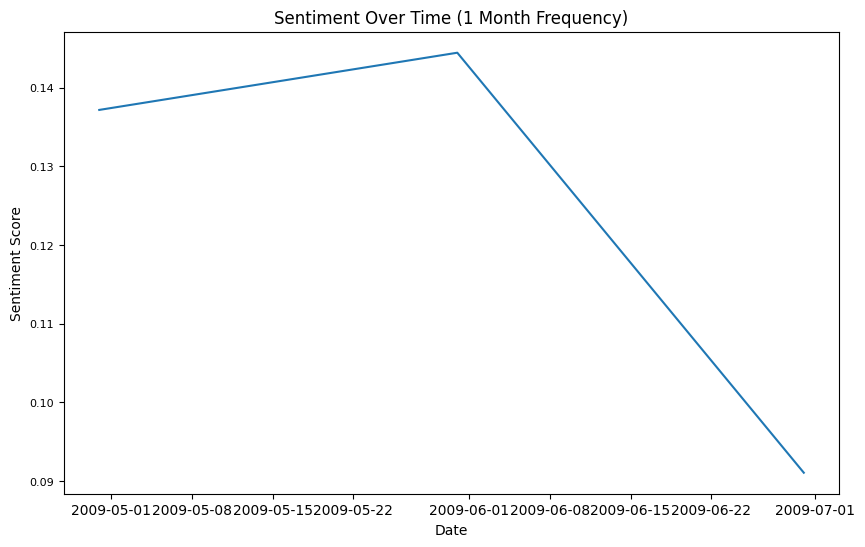

In [ ]:
# Resample to 1 month with explicitly setting the labels to the left endpoint
df_monthly = df.resample('M', closed='left').mean()

# Handle Missing Values
df_monthly = df_monthly.dropna()

# Visualize Data for 1 month with larger figure size
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Sentiment'])
plt.title('Sentiment Over Time (1 Month Frequency)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')

# Adjust y-axis label font size
plt.tick_params(axis='y', labelsize=8)

plt.show()


In [ ]:
# Print the first few rows of the resampled DataFrame
print(df_monthly.head())


                           Code  is_continuous   group_id  Sentiment
date_without_hour                                                   
2009-04-30         1.541304e+09       0.999980   3.586663   0.137154
2009-05-31         1.879269e+09       0.999983  17.613736   0.145518
2009-06-30         2.122968e+09       0.999998  25.056543   0.084902


In [ ]:
# Print the first few rows of the resampled DataFrame for 3 months
print(df_quarterly.head())


                           Code  is_continuous   group_id  Sentiment
date_without_hour                                                   
2009-06-30         1.998818e+09       0.999991  21.033223   0.110004


In [ ]:
# Print the resampled DataFrame for 3 months
print(df_quarterly)


                           Code  is_continuous   group_id  Sentiment
date_without_hour                                                   
2009-06-30         1.998818e+09       0.999991  21.033223   0.110004


In [ ]:
!pip install --upgrade pmdarima



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


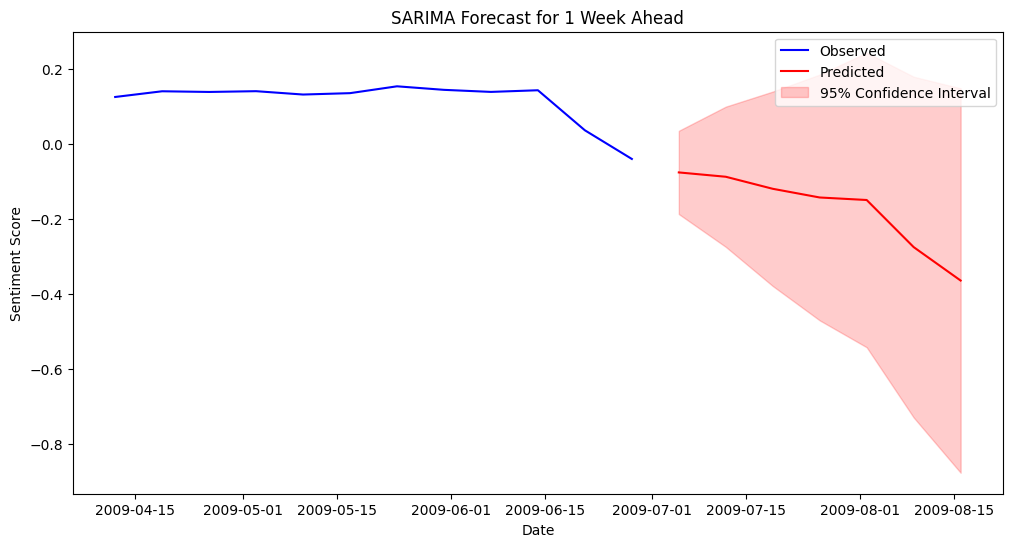

Root Mean Squared Error (RMSE): 0.27819067616445936


In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Manually specify SARIMA order
order = (1, 1, 1)  # Example order, you may need to adjust
seasonal_order = (1, 1, 1, 7)  # Example seasonal order for weekly seasonality, you may need to adjust

# Fit SARIMA model
sarima_model = SARIMAX(df_weekly['Sentiment'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

# Forecast
n_forecast = 7  # Number of days to forecast
forecast = sarima_fit.get_forecast(steps=n_forecast)

# Confidence intervals
ci = forecast.conf_int()

# Visualize observed, predicted, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly['Sentiment'], label='Observed', color='blue')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean.values, color='red', label='Predicted')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('SARIMA Forecast for 1 Week Ahead')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

# Evaluate the model
observed = df_weekly['Sentiment'].tail(n_forecast)
forecasted = forecast.predicted_mean

mse = mean_squared_error(observed, forecasted)
rmse = sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")



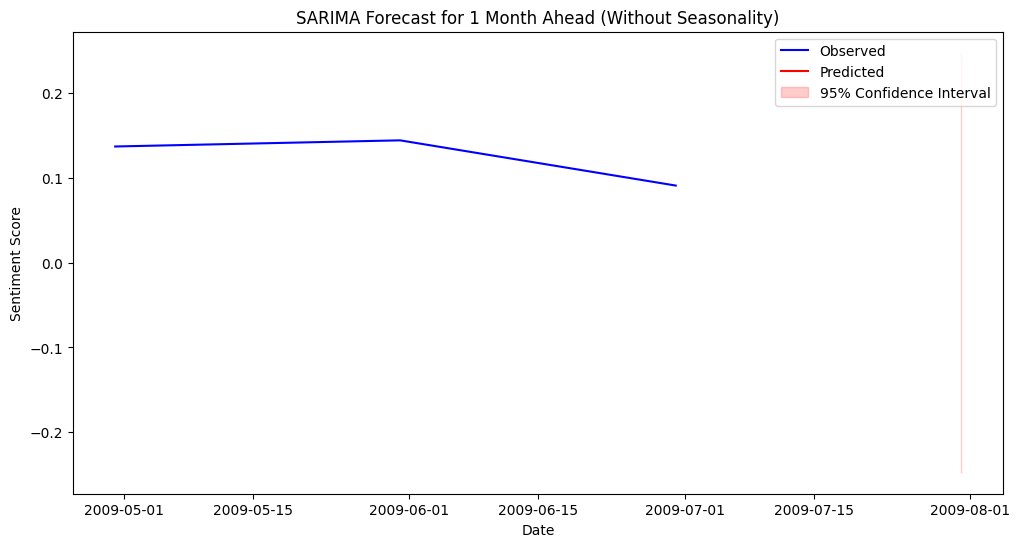

Root Mean Squared Error (RMSE) for 1 Month Ahead: 0.09105233933348786


In [ ]:
# Fit SARIMA model with adjusted seasonality
model_monthly = auto_arima(df_monthly['Sentiment'], seasonal=False)  # Turn off seasonality
sarima_model_monthly = SARIMAX(df_monthly['Sentiment'], order=model_monthly.order)
sarima_fit_monthly = sarima_model_monthly.fit()

# Forecast
n_forecast_monthly = 1  # Number of months to forecast
forecast_monthly = sarima_fit_monthly.get_forecast(steps=n_forecast_monthly)

# Confidence intervals
ci_monthly = forecast_monthly.conf_int()

# Visualize observed, predicted, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Sentiment'], label='Observed', color='blue')
plt.plot(forecast_monthly.predicted_mean.index, forecast_monthly.predicted_mean.values, color='red', label='Predicted')
plt.fill_between(ci_monthly.index, ci_monthly.iloc[:, 0], ci_monthly.iloc[:, 1], color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('SARIMA Forecast for 1 Month Ahead (Without Seasonality)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

# Evaluate the model
observed_monthly = df_monthly['Sentiment'].tail(n_forecast_monthly)
forecasted_monthly = forecast_monthly.predicted_mean

mse_monthly = mean_squared_error(observed_monthly, forecasted_monthly)
rmse_monthly = sqrt(mse_monthly)
print(f"Root Mean Squared Error (RMSE) for 1 Month Ahead: {rmse_monthly}")




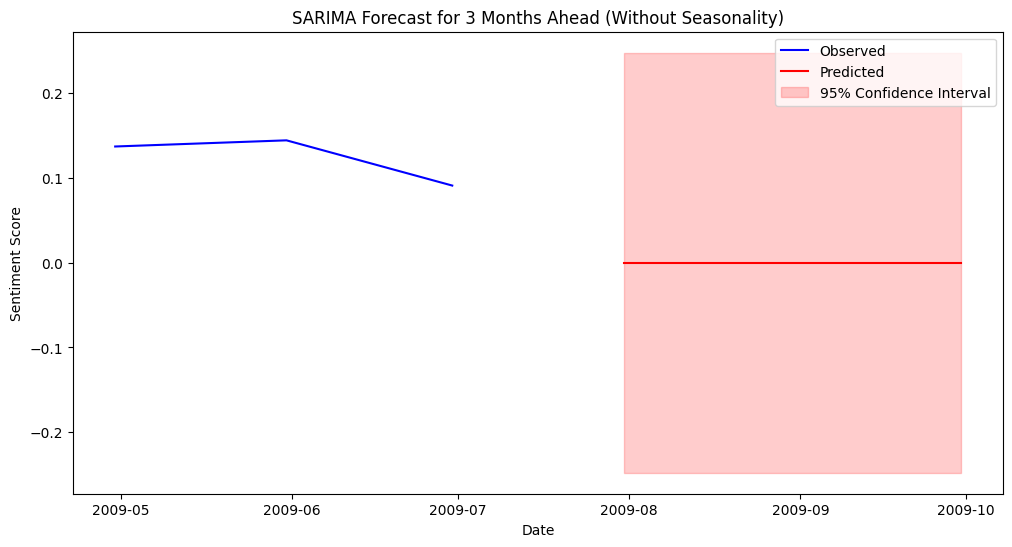

Root Mean Squared Error (RMSE) for 3 Months Ahead: 0.12643734649417965


In [ ]:
# Fit SARIMA model with adjusted seasonality
model_monthly = auto_arima(df_monthly['Sentiment'], seasonal=False)  # Turn off seasonality
sarima_model_monthly = SARIMAX(df_monthly['Sentiment'], order=model_monthly.order)
sarima_fit_monthly = sarima_model_monthly.fit()

# Forecast for 3 months
n_forecast_monthly = 3  # Number of months to forecast
forecast_monthly = sarima_fit_monthly.get_forecast(steps=n_forecast_monthly)

# Confidence intervals
ci_monthly = forecast_monthly.conf_int()

# Visualize observed, predicted, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Sentiment'], label='Observed', color='blue')
plt.plot(forecast_monthly.predicted_mean.index, forecast_monthly.predicted_mean.values, color='red', label='Predicted')
plt.fill_between(ci_monthly.index, ci_monthly.iloc[:, 0], ci_monthly.iloc[:, 1], color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('SARIMA Forecast for 3 Months Ahead (Without Seasonality)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

# Evaluate the model
observed_monthly = df_monthly['Sentiment'].tail(n_forecast_monthly)
forecasted_monthly = forecast_monthly.predicted_mean

mse_monthly = mean_squared_error(observed_monthly, forecasted_monthly)
rmse_monthly = sqrt(mse_monthly)
print(f"Root Mean Squared Error (RMSE) for 3 Months Ahead: {rmse_monthly}")


In [ ]:
pip install tensorflow keras


In [ ]:
!pip install plotly dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 43.5 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px



app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='sentiment-over-time'),
    html.Label('Select Frequency:'),
    dcc.Dropdown(
        id='frequency-dropdown',
        options=[
            {'label': '1 Week', 'value': 'W'},
            {'label': '1 Month', 'value': 'M'},
            {'label': '3 Months', 'value': '3M'}
        ],
        value='W'
    )
])

@app.callback(
    Output('sentiment-over-time', 'figure'),
    [Input('frequency-dropdown', 'value')]
)
def update_figure(selected_frequency):
    # Resample the data based on the selected frequency
    df_resampled = df_weekly.resample(selected_frequency).mean().dropna()

    # Plot the figure using plotly express
    fig = px.line(df_resampled, x=df_resampled.index, y='Sentiment', title=f'Sentiment Over Time ({selected_frequency} Frequency)')
    return fig

if __name__ == '__main__':
    app.run_server(mode='inline', port=8050)


<IPython.core.display.Javascript object>